#### Import python files from another directory
In order to reuse code written in .py files you need to import them.
If they are from a distant folder, rather than copy-paste it into the current folder, you can write:

In [134]:
import sys
sys.path.append("../Exercise_2") # This goes up twice in the directories tree (hence in labs)
                                       # then goes down to ex02/template where your files from lab 2 are.

you can now import your desired files, for example, we can import grid_search.py with:

In [135]:
import grid_search        # You then need to call your functions using grid_search.function_name()
import grid_search as gs  # You then need to call your functions using gs.function_name()
from grid_search import * # You can call any functions of the file with function_name()

# Let's try to call generate_w from grid_search.py:
w0, w1 = generate_w(5)
print(w0, w1)

[-200. -100.    0.  100.  200.] [-200.  -112.5  -25.    62.5  150. ]


As you can see we are now able to call functions from the grid_search.py file.

In [136]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from helpers import *
from gradient_descent import *
from test_utils import test
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# 1 Least squares and linear basis functions models
## 1.1 Least squares

In [137]:
from costs import *

def least_squares(y, tx):
    w = np.linalg.solve(tx.T.dot(tx), tx.T.dot(y))
    return compute_loss(y, tx, w,'mse'), w
    """Calculate the least squares solution.
       returns mse, and optimal weights.
    
    Args:
        y: numpy array of shape (N,), N is the number of samples.
        tx: numpy array of shape (N,D), D is the number of features.
    
    Returns:
        w: optimal weights, numpy array of shape(D,), D is the number of features.
        mse: scalar.

    >>> least_squares(np.array([0.1,0.2]), np.array([[2.3, 3.2], [1., 0.1]]))
    (array([ 0.21212121, -0.12121212]), 8.666684749742561e-33)
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # least squares: TODO
    # returns mse, and optimal weights
    # ***************************************************
    



### You can test your implementation here

In [138]:
test(least_squares)
#least_squares(np.array([0.1,0.2]), np.array([[2.3, 3.2], [1., 0.1]]))
# NB:
# 
# Due to precision issues, 
# the output might not be exactly the same 
# even if you have implemented the right code.
#
# For example, the mse output expected to be
# 8.666684749742561e-33,
# but you might get some other small number
# close to zero.
#
# In this case,
# Failing the test doesn't necessarily means
# your implementation is wrong.:) 

### Load the data
Here we will reuse the dataset `height_weight_genders.csv` from previous exercise section to check the correctness of your implementation. Please compare it with your previous result.

In [139]:
from gradient_descent import *
def test_your_least_squares():
    """
    # this code should compare the optimal weights obtained
    # by least squares vs. grid search
    """
    height, weight, gender = load_data_from_ex02(sub_sample=False, add_outlier=False)
    x, mean_x, std_x = standardize(height)
    y, tx = build_model_data(x, weight)
    ### SOLUTION
    w, mse = least_squares(y, tx)
    w_gd, mse_gd = gradient_descent(
        y, tx, initial_w=np.array([0, 0]), max_iters=10, gamma=0.7
    )
    print("Solution LS: ", w, "MSE: ", mse)
    print("Solution GD: ", w_gd[-1], "MSE: ", mse_gd[-1])

Test it here

In [140]:
test_your_least_squares()

GD iter. 0/9: loss=2792.2367127591674, w0=51.305745401473644, w1=9.435798704492269
GD iter. 1/9: loss=265.3024621089598, w0=66.69746902191571, w1=12.266538315840005
GD iter. 2/9: loss=37.87837955044126, w0=71.31498610804834, w1=13.115760199244333
GD iter. 3/9: loss=17.410212120174467, w0=72.70024123388814, w1=13.370526764265632
GD iter. 4/9: loss=15.568077051450455, w0=73.11581777164007, w1=13.446956733772023
GD iter. 5/9: loss=15.402284895265295, w0=73.24049073296565, w1=13.469885724623941
GD iter. 6/9: loss=15.38736360120863, w0=73.27789262136334, w1=13.476764421879516
GD iter. 7/9: loss=15.38602068474353, w0=73.28911318788263, w1=13.478828031056189
GD iter. 8/9: loss=15.385899822261674, w0=73.29247935783842, w1=13.47944711380919
GD iter. 9/9: loss=15.385888944638305, w0=73.29348920882515, w1=13.47963283863509
Solution LS:  15.3858878688294 MSE:  [73.293922   13.47971243]
Solution GD:  15.385888944638305 MSE:  [73.29348921 13.47963284]


## 1.2 Least squares with a linear basis function model
Start from this section, we will use the dataset `dataEx3.csv`.

### Implement polynomial basis functions

In [146]:
# load dataset
x, y = load_data()
print("shape of x {}".format(x.shape))
print("shape of y {}".format(y.shape))

shape of x (50,)
shape of y (50,)


In [153]:
def build_poly(x, degree):
    poly = np.ones((len(x), 1))
    for deg in range(1, degree + 1):
        poly = np.c_[poly, np.power(x, deg)]
    return poly
    """polynomial basis functions for input data x, for j=0 up to j=degree.
    
    Args:
        x: numpy array of shape (N,), N is the number of samples.
        degree: integer.
        
    Returns:
        poly: numpy array of shape (N,d+1)
        
    >>> build_poly(np.array([0.0, 1.5]), 2)
    array([[1.  , 0.  , 0.  ],
           [1.  , 1.5 , 2.25]])
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # polynomial basis function: TODO
    # this function should return the matrix formed
    # by applying the polynomial basis to the input data
    # ***************************************************

In [154]:
test(build_poly)

Let us play with polynomial regression. Note that we will use your implemented function `compute_mse`. Please copy and paste your implementation from exercise02.

In [164]:
from plots import *
def polynomial_regression():
    """Constructing the polynomial basis function expansion of the data,
       and then running least squares regression."""
    # define parameters
    degrees = [1, 3, 7, 12]
    
    # define the structure of the figure
    num_row = 2
    num_col = 2
    f, axs = plt.subplots(num_row, num_col)

    for ind, degree in enumerate(degrees):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # form the data to do polynomial regression.: TODO
        # ***************************************************
        tx = build_poly(x,degree) #This is truely the transpose as the rows correspond to features and columns correspond to N.
        # ***************************************************
        # INSERT YOUR CODE HERE
        # least square and calculate RMSE: TODO
        # ***************************************************
        mse,weights = least_squares(y,tx) #Recall least squares takes the transpose of x as second argument.
        rmse = np.sqrt(2 * mse) #because we divided b 2 in the mse computation to ease the expression for the gradient.

        print("Processing {i}th experiment, degree={d}, rmse={loss}".format(
              i=ind + 1, d=degree, loss=rmse))
        # plot fit
        plot_fitted_curve(
            y, x, weights, degree, axs[ind // num_col][ind % num_col])
    plt.tight_layout()

    plt.show()

Run polynomial regression

Processing 1th experiment, degree=1, rmse=0.47187607963421874
Processing 2th experiment, degree=3, rmse=0.25858277667737484
Processing 3th experiment, degree=7, rmse=0.24965870360907552
Processing 4th experiment, degree=12, rmse=0.24328247481248674


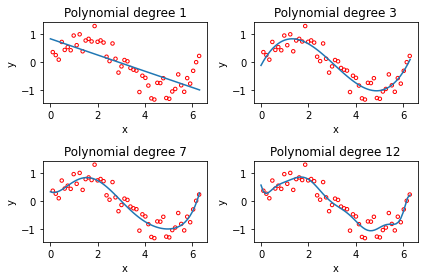

In [160]:
polynomial_regression()

Your results should look like this:

# 2 Evaluating model predication performance

Let us show the train and test splits for various polynomial degrees. First of all, please fill in the function `split_data()`

In [162]:
def split_data(x, y, ratio, seed=1):
    # generate random indices
    num_row = len(y)
    indices = np.random.permutation(num_row)
    index_split = int(np.floor(ratio * num_row))
    index_tr = indices[:index_split]
    index_te = indices[index_split:]
    # create split
    x_tr = x[index_tr]
    x_te = x[index_te]
    y_tr = y[index_tr]
    y_te = y[index_te]
    return x_tr, x_te, y_tr, y_te

In [163]:
test(split_data)

Then, test your `split_data` function below.

In [169]:
def train_test_split_demo(x, y, degree, ratio, seed):
    x_tr, x_te, y_tr, y_te = split_data(x,y,ratio,seed)

    xt_tr = build_poly(x_tr,degree)
    mse_tr, weights_tr = least_squares(y_tr,xt_tr)
    rmse_tr = np.sqrt(2*mse_tr)

    xt_te = build_poly(x_te,degree)
    mse_te, weights_te = least_squares(y_te,xt_te) # We won't use these weights obviously
    rmse_te = np.sqrt(2*mse_te)

    """polynomial regression with different split ratios and different degrees.
    
    Returns:
      x_tr: numpy array
      x_te: numpy array
      y_tr: numpy array
      y_te: numpy array
      weights: weights from the least squares optimization"""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # split the data, and return train and test data: TODO
    # ***************************************************

    # ***************************************************
    # INSERT YOUR CODE HERE
    # form train and test data with polynomial basis function: TODO
    # ***************************************************

    # ***************************************************
    # INSERT YOUR CODE HERE
    # calculate weight through least square: TODO
    # ***************************************************

    # ***************************************************
    # INSERT YOUR CODE HERE
    # calculate RMSE for train and test data,
    # and store them in rmse_tr and rmse_te respectively: TODO
    # ***************************************************

    print("proportion={p}, degree={d}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(
          p=ratio, d=degree, tr=rmse_tr, te=rmse_te))
    return x_tr,x_te,y_tr,y_te, weights_tr


Demo time

proportion=0.9, degree=1, Training RMSE=0.472, Testing RMSE=0.161
proportion=0.9, degree=3, Training RMSE=0.258, Testing RMSE=0.020
proportion=0.9, degree=7, Training RMSE=0.249, Testing RMSE=0.000
proportion=0.9, degree=12, Training RMSE=0.247, Testing RMSE=0.000
proportion=0.7, degree=1, Training RMSE=0.499, Testing RMSE=0.316
proportion=0.7, degree=3, Training RMSE=0.272, Testing RMSE=0.208
proportion=0.7, degree=7, Training RMSE=0.251, Testing RMSE=0.189
proportion=0.7, degree=12, Training RMSE=0.230, Testing RMSE=0.212
proportion=0.5, degree=1, Training RMSE=0.529, Testing RMSE=0.391
proportion=0.5, degree=3, Training RMSE=0.232, Testing RMSE=0.226
proportion=0.5, degree=7, Training RMSE=0.241, Testing RMSE=0.240
proportion=0.5, degree=12, Training RMSE=0.214, Testing RMSE=0.207
proportion=0.1, degree=1, Training RMSE=0.527, Testing RMSE=0.456
proportion=0.1, degree=3, Training RMSE=0.011, Testing RMSE=0.248
proportion=0.1, degree=7, Training RMSE=0.000, Testing RMSE=0.255
proport

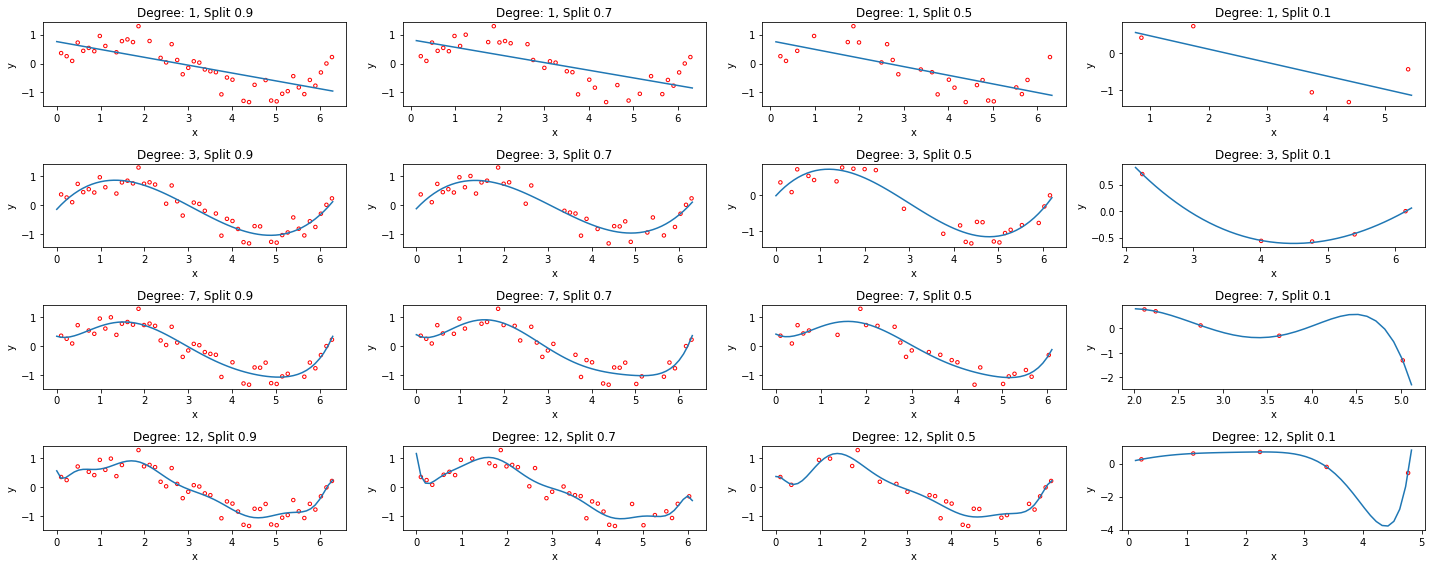

In [170]:
seed = 6
degrees = [1, 3, 7, 12]
split_ratios = [0.9, 0.7, 0.5, 0.1]

# define the structure of the figure
num_row = 4
num_col = 4
axs = plt.subplots(num_row, num_col, figsize=(20,8))[1]

for ind, split_ratio in enumerate(split_ratios):
    for ind_d, degree in enumerate(degrees):
        x_tr, x_te, y_tr, y_te, w = train_test_split_demo(x, y, degree, split_ratio, seed)
        plot_fitted_curve(
            y_tr, x_tr, w, degree, axs[ind_d][ind % num_col])
        axs[ind_d][ind].set_title(f'Degree: {degree}, Split {split_ratio}')
plt.tight_layout()


Your graph should look like this:

# Ridge Regression
Please fill in the function below.

In [172]:
def ridge_regression(y, tx, lambda_): #_ to  indicate regularisation parameter.
    aI = 2 * tx.shape[0] * lambda_ * np.identity(tx.shape[1])
    a = tx.T.dot(tx) + aI
    b = tx.T.dot(y)
    return np.linalg.solve(a, b)

In [174]:
test(ridge_regression)

In [177]:
def ridge_regression_demo(x, y, degree, ratio, seed):
    """ridge regression demo."""
    # define parameter
    lambdas = np.logspace(-5, 0, 15)

    # ***************************************************
    # INSERT YOUR CODE HERE
    # split the data, and return train and test data: TODO
    # ***************************************************
    x_tr, x_te, y_tr, y_te = split_data(x,y,ratio,seed)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # form train and test data with polynomial basis function: TODO
    # ***************************************************
    
    xt_tr = build_poly(x_tr,degree)

    xt_te = build_poly(x_te,degree)


    rmse_tr = []
    rmse_te = []
    for ind, lambda_ in enumerate(lambdas):
        weight = ridge_regression(y_tr, xt_tr, lambda_) 
        rmse_tr.append(np.sqrt(2 * compute_loss(y_tr, xt_tr, weight,'mse')))
        rmse_te.append(np.sqrt(2 * compute_loss(y_te, xt_te, weight,'mse')))
        
        # ***************************************************
        # INSERT YOUR CODE HERE
        # ridge regression with a given lambda
        # ***************************************************
        print("proportion={p}, degree={d}, lambda={l:.3f}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(
               p=ratio, d=degree, l=lambda_, tr=rmse_tr[ind], te=rmse_te[ind]))
    plot_train_test(rmse_tr, rmse_te, lambdas, degree)

Demo time

proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.220, Testing RMSE=0.316
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.222, Testing RMSE=0.314
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.223, Testing RMSE=0.313
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.225, Testing RMSE=0.312
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.226, Testing RMSE=0.311
proportion=0.5, degree=7, lambda=0.001, Training RMSE=0.226, Testing RMSE=0.310
proportion=0.5, degree=7, lambda=0.001, Training RMSE=0.227, Testing RMSE=0.308
proportion=0.5, degree=7, lambda=0.003, Training RMSE=0.227, Testing RMSE=0.304
proportion=0.5, degree=7, lambda=0.007, Training RMSE=0.229, Testing RMSE=0.299
proportion=0.5, degree=7, lambda=0.016, Training RMSE=0.232, Testing RMSE=0.292
proportion=0.5, degree=7, lambda=0.037, Training RMSE=0.242, Testing RMSE=0.292
proportion=0.5, degree=7, lambda=0.085, Training RMSE=0.261, Testing RMSE=0.314
proportion=0.5, degree=7, lambda=0.193, 

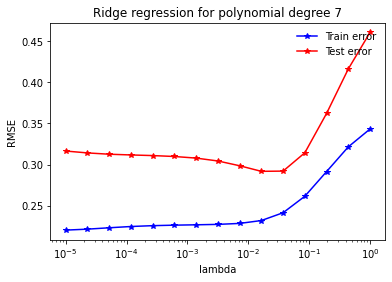

In [178]:
seed = 56
degree = 7
split_ratio = 0.5
ridge_regression_demo(x, y, degree, split_ratio, seed)


Your plot should look like: